In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

print("✅ Librerie importate")

✅ Librerie importate


In [3]:
# carico i dati
df = pd.read_csv("../data/Housing.csv")

X = df[['area', 'bathrooms']]
y = df['price']

print("✅ caricato i dati")

✅ caricato i dati


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% dei valori sono di test, il resto train
    random_state=42, # seed, per rendere riproducibile l'esperimento
    )

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Modello allenato con successo 💪")

✅ Modello allenato con successo 💪


## Guardiamo dentro la scatola nera
Dato che il modello che abbiamo usato è una regressione lineare  
`Y = mX + q`

1. `model.coef_` restituisce m (quanto cresce il prezzo in base a quanto crescono i valori che abbiamo usato)
2. `model.intercept_` restituisce q

In [5]:
print(f"m: {model.coef_}")
print(f"q: {model.intercept_}")

m: [3.55225649e+02 1.63420824e+06]
q: 806645.4709387869


## Facciamo le previsioni
1. Previsioni con `.predict()`
2. Verifico l'errore del modello con `mean_squared_error()` `r2_score()`

In [6]:
# Faccio le previsioni sui dati di test
y_pred = model.predict(X_test)

# verifico l'errore
errore_medio = mean_squared_error(y_test, y_pred)
print(f"R2 score: {r2_score(y_test, y_pred):.3f}")

R2 score: 0.429


## Grafico della dispersione

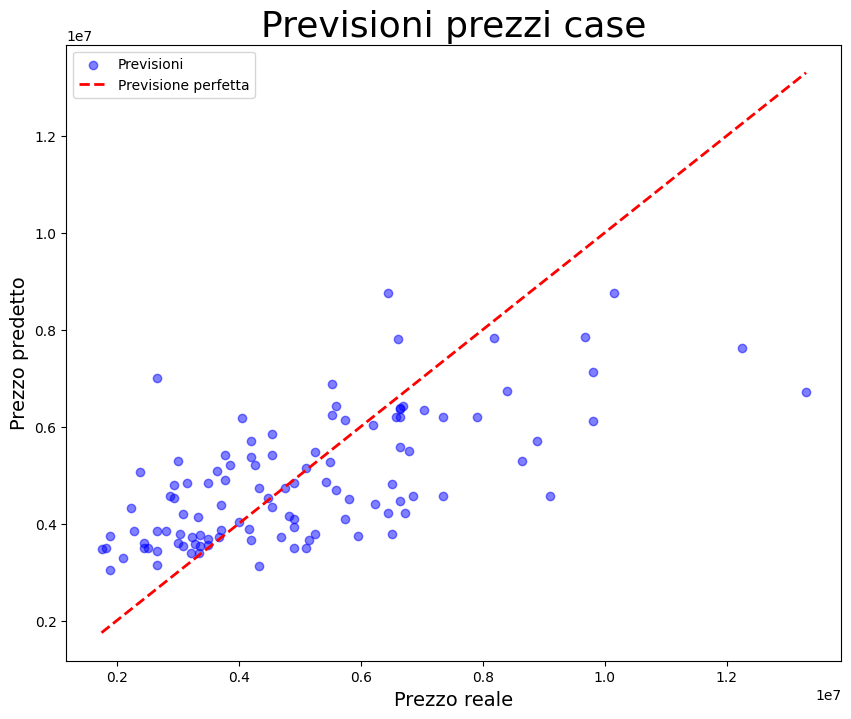

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Previsioni')
min_value = y_test.min()
max_value = y_test.max()
# disegno la linea del prezzo perfetto: X va da min a max e Y va da min a max (risultato 45 gradi)
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', linewidth=2, label='Previsione perfetta')
plt.title("Previsioni prezzi case", size=26)
plt.xlabel("Prezzo reale", size=14)
plt.ylabel("Prezzo predetto", size=14)
plt.legend()
plt.show()